![](https://i.imgur.com/E4eJdxu.png)

So... how **happy** are we? 

Are we **happier** than last year? 

How happy are some of us **other than others**? 

What **dictates** our happiness?

It's time to find out. 😎

# 1. Imports, Data Preprocessing, Missing Values?

In [1]:
# Imports and preparing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

import warnings
warnings.filterwarnings("ignore")

import folium # for the map

# Setting the default style of the plots
sns.set_style('whitegrid')
sns.set_palette('Set2')

# My custom color palette
my_palette = ["#7A92FF", "#FF7AEF", "#B77AFF", "#A9FF7A", "#FFB27A", "#FF7A7A",
             "#7AFEFF", "#D57AFF", "#FFDF7A", "#D3FF7A"]

# Importing the 3 datasets
data_2015 = pd.read_csv("../input/world-happiness/2015.csv")
data_2016 = pd.read_csv("../input/world-happiness/2016.csv")
data_2017 = pd.read_csv("../input/world-happiness/2017.csv")

# First we need to prepare the data for merging the tables together (to form only 1 table)
# Tables have different columns, so first we will keep only the columns we need
data_2015 = data_2015[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']]
data_2016 = data_2016[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']]
data_2017 = data_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
                       'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 
                       'Dystopia.Residual']]

# Tables do not have the same column names, so we need to fix that
new_names = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']

data_2015.columns = new_names
data_2016.columns = new_names
data_2017.columns = new_names

# Add a new column containing the year of the survey
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017

# Merge the data together
data = pd.concat([data_2015, data_2016, data_2017], axis=0)
data.head(3)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2015


### Update: 2018 and 2019 data dropped in 😁

In [2]:
# New data
data_2018 = pd.read_csv("../input/world-happiness/2018.csv")
data_2019 = pd.read_csv("../input/world-happiness/2019.csv")

# Concatenate data
data_2018['Year'] = 2018
data_2019['Year'] = 2019

new_data = pd.concat([data_2018, data_2019], axis=0)

# Switching overall rank column with country/ region
columns_titles = ['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year']
new_data = new_data.reindex(columns=columns_titles)

# Renaming old data columns:
old_data = data[['Country', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)', 'Family', 
                 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Year']]
old_data.columns = ['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year']

# Finally, concatenating all data
data = pd.concat([old_data, new_data], axis=0)

data.head(3)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015


### Missing values

There is only one missing value in the data, so we will just drop it.

In [3]:
data[data['Perceptions of corruption'].isna()]

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
19,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [4]:
data.dropna(axis = 0, inplace = True)

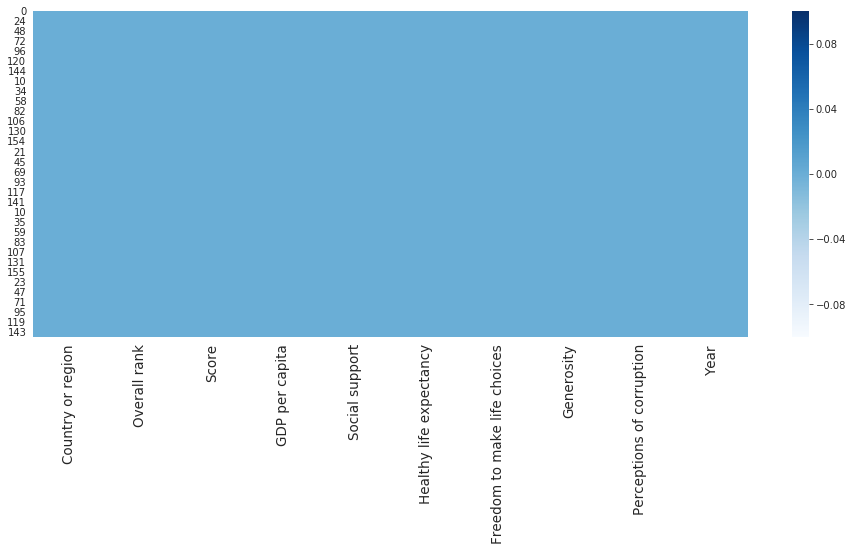

In [5]:
# Double check to see if there are any missing values left
plt.figure(figsize = (16,6))
sns.heatmap(data = data.isna(), cmap = 'Blues')

plt.xticks(fontsize = 13.5);

We're done with the preprocessing part.

#### Let's get to business!

# 2. Let's familiarize with the numbers

## I. Shape of Data

In [6]:
data.shape

# 10 columns, 781 rows

(781, 10)

## II. Summary Statistics

In [7]:
data.groupby(by='Year')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,5.375734,1.145010,2.839,4.5260,5.2325,6.24375,7.587
2016,157.0,5.382185,1.141674,2.905,4.4040,5.3140,6.26900,7.526
2017,155.0,5.354019,1.131230,2.693,4.5055,5.2790,6.10150,7.537
2018,155.0,5.366897,1.117433,2.905,4.4515,5.3580,6.15400,7.632
2019,156.0,5.407096,1.113120,2.853,4.5445,5.3795,6.18450,7.769


 * Well, looks like we are **slowly but shurely** becoming less and less happy.
 * 2019 was **better** than 2018, but still 2015 is the happiest year in our data.
 
## Factors difference between 2015 and 2019
 
 We first need to create a dataframe with the next columns:
 * `Factor` - our 7 factors
 * `Year` - the years between 2015 and 2019
 * `Avg_value` - average value of the factor for the year

In [8]:
# First we group the data by year and average the factors
grouped = data.groupby(by = 'Year')[['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].mean().reset_index()

# Now we reconstruct the df by using melt() function
grouped = pd.melt(frame = grouped, id_vars='Year', value_vars=['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], var_name='Factor', value_name='Avg_value')

grouped.head()

,Year,Factor,Avg_value
0,2015,Score,5.375734
1,2016,Score,5.382185
2,2017,Score,5.354019
3,2018,Score,5.366897
4,2019,Score,5.407096


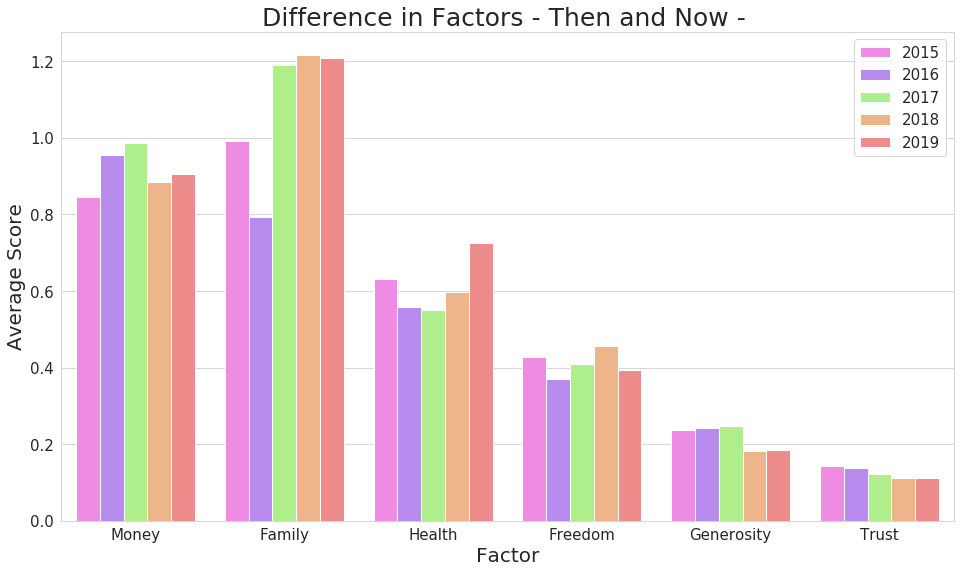

In [9]:
plt.figure(figsize = (16, 9))

ax = sns.barplot(x = grouped[grouped['Factor'] != 'Score']['Factor'], y = grouped['Avg_value'], 
            palette = my_palette[1:], hue = grouped['Year'])

plt.title("Difference in Factors - Then and Now - ", fontsize = 25)
plt.xlabel("Factor", fontsize = 20)
plt.ylabel("Average Score", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

ax.set_xticklabels(['Money','Family', 'Health', 'Freedom', 'Generosity', 'Trust']);

Let's look closer at the **top 10 nations** from top to bottom and from bottom to top... how do they look like?
## III. Which are the happiest people in 2019?

In [10]:
# Average top 5 most happy countries
country_score_avg = data[data['Year']==2019].groupby(by = ['Country or region'])['Score'].mean().reset_index()
table = country_score_avg.sort_values(by = 'Score', ascending = False).head(10)

table

,Country or region,Score
43,Finland,7.769
36,Denmark,7.600
105,Norway,7.554
57,Iceland,7.494
98,Netherlands,7.488
133,Switzerland,7.480
132,Sweden,7.343
99,New Zealand,7.307
23,Canada,7.278
6,Austria,7.246


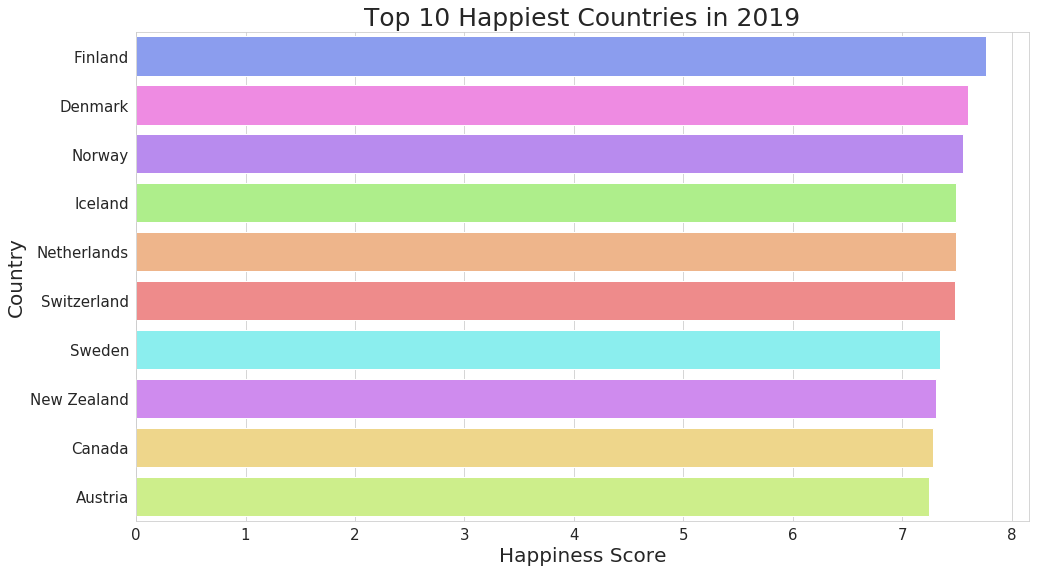

In [11]:
plt.figure(figsize = (16, 9))
sns.barplot(y = table['Country or region'], x = table['Score'], palette = my_palette)

plt.title("Top 10 Happiest Countries in 2019", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

## IV. Which are the least happy people in 2019?

In [12]:
# Average top 5 most "not that happy" countries
table2 = country_score_avg.sort_values(by = 'Score', ascending = True).head(10)

table2

,Country or region,Score
128,South Sudan,2.853
24,Central African Republic,3.083
0,Afghanistan,3.203
137,Tanzania,3.231
117,Rwanda,3.334
153,Yemen,3.380
83,Malawi,3.410
134,Syria,3.462
16,Botswana,3.488
53,Haiti,3.597


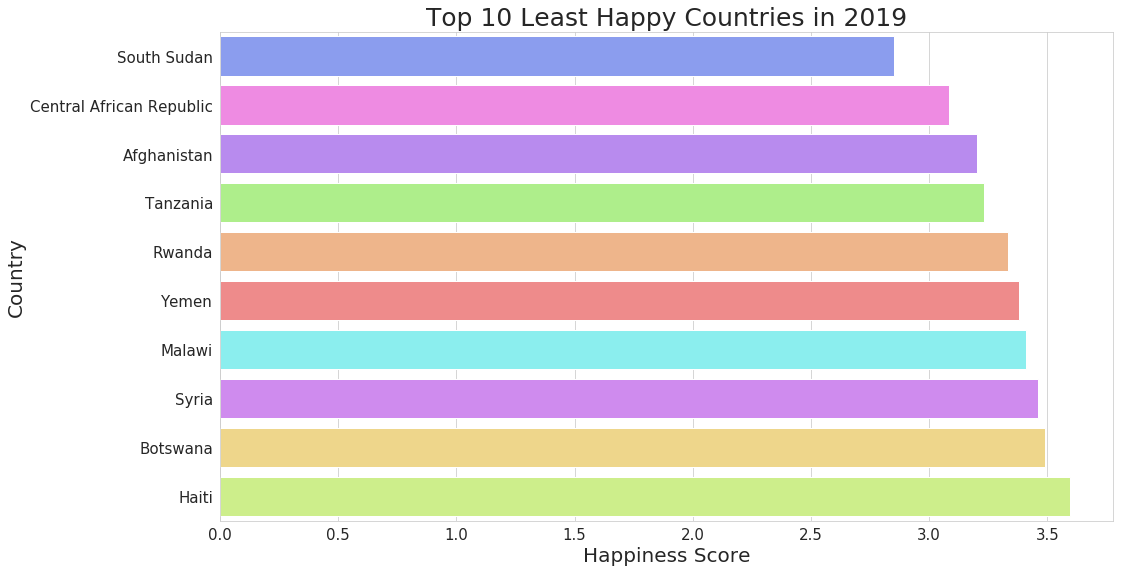

In [13]:
plt.figure(figsize = (16, 9))
sns.barplot(y = table2['Country or region'], x = table2['Score'], palette = my_palette)

plt.title("Top 10 Least Happy Countries in 2019", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

* Nothing surprising here either. Countries in **war zones** or with **poor sanitation systems**, diseases or very poor infrastructure are the least happy people out of all.

Let's give them a hand! 🤝

## V. Distribution of Smiles

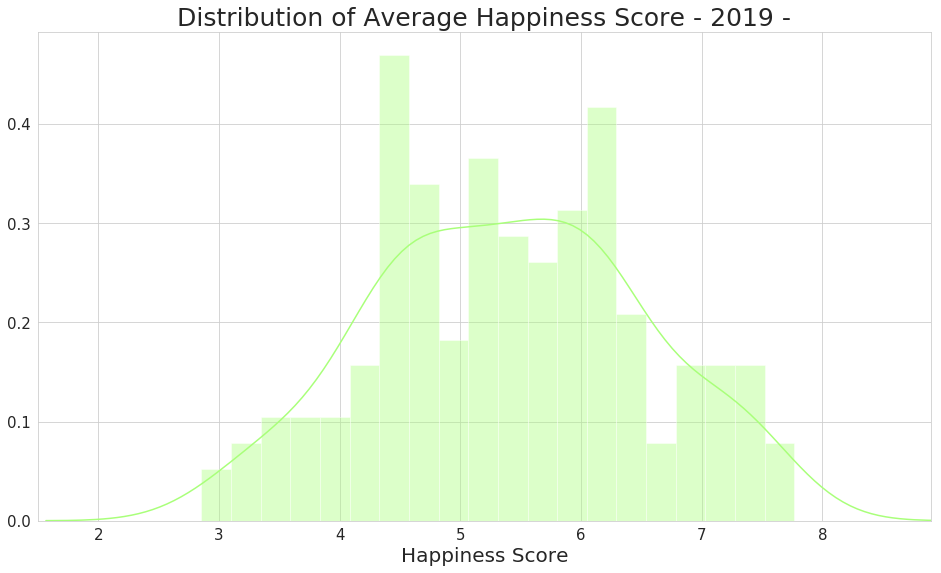

In [14]:
# Checking the distribution for Happiness Score
plt.figure(figsize = (16, 9))

sns.distplot(a = country_score_avg['Score'], bins = 20, kde = True, color = "#A9FF7A")
plt.xlabel('Happiness Score', fontsize = 20)
plt.title('Distribution of Average Happiness Score - 2019 -', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((1.5, 8.9));

* The distribution of happiness is quite **platykurtic**, evenly spread between a score of ~3 and 7.5.

## Distribution for the other factors

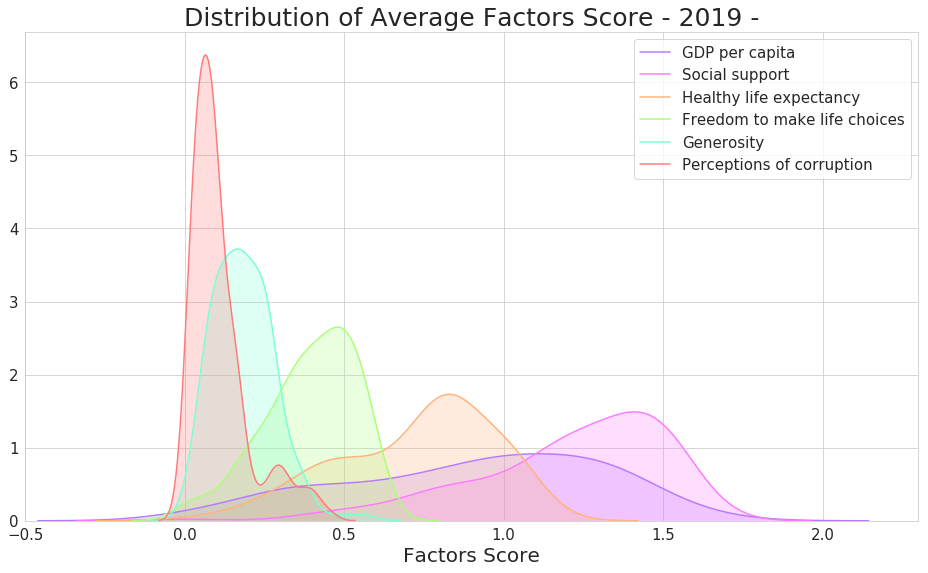

In [15]:
## Creating the grouped table
country_factors_avg = data[data['Year'] == 2019].groupby(by = ['Country or region'])[['GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].mean().reset_index()

plt.figure(figsize = (16, 9))

sns.kdeplot(data = country_factors_avg['GDP per capita'], color = "#B77AFF", shade = True)
sns.kdeplot(data = country_factors_avg['Social support'], color = "#FD7AFF", shade = True)
sns.kdeplot(data = country_factors_avg['Healthy life expectancy'], color = "#FFB27A", shade = True)
sns.kdeplot(data = country_factors_avg['Freedom to make life choices'], color = "#A9FF7A", shade = True)
sns.kdeplot(data = country_factors_avg['Generosity'], color = "#7AFFD4", shade = True)
sns.kdeplot(data = country_factors_avg['Perceptions of corruption'], color = "#FF7A7A", shade = True)

plt.xlabel('Factors Score', fontsize = 20)
plt.title('Distribution of Average Factors Score - 2019 -', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((-0.5, 2.3))
plt.legend(fontsize = 15);

Now, let's see the intensity of the correlation between the happiness score and its 7 main influencer factors:

## VI. What Influences Happiness?

In [16]:
# Calculating the Pearson Correlation

c1 = scipy.stats.pearsonr(data['Score'], data['GDP per capita'])
c2 = scipy.stats.pearsonr(data['Score'], data['Social support'])
c3 = scipy.stats.pearsonr(data['Score'], data['Healthy life expectancy'])
c4 = scipy.stats.pearsonr(data['Score'], data['Freedom to make life choices'])
c5 = scipy.stats.pearsonr(data['Score'], data['Generosity'])
c6 = scipy.stats.pearsonr(data['Score'], data['Perceptions of corruption'])

print('Happiness Score + GDP: pearson = ', round(c1[0],2), '   pvalue = ', round(c1[1],4))
print('Happiness Score + Family: pearson = ', round(c2[0],2), '   pvalue = ', round(c2[1],4))
print('Happiness Score + Health: pearson = ', round(c3[0],2), '   pvalue = ', round(c3[1],4))
print('Happiness Score + Freedom: pearson = ', round(c4[0],2), '   pvalue = ', round(c4[1],4))
print('Happiness Score + Generosity: pearson = ', round(c5[0],2), '   pvalue = ', round(c5[1],4))
print('Happiness Score + Trust: pearson = ', round(c6[0],2), '   pvalue = ', round(c6[1],4))

Happiness Score + GDP: pearson =  0.79    pvalue =  0.0
Happiness Score + Family: pearson =  0.65    pvalue =  0.0
Happiness Score + Health: pearson =  0.74    pvalue =  0.0
Happiness Score + Freedom: pearson =  0.55    pvalue =  0.0
Happiness Score + Generosity: pearson =  0.14    pvalue =  0.0001
Happiness Score + Trust: pearson =  0.4    pvalue =  0.0


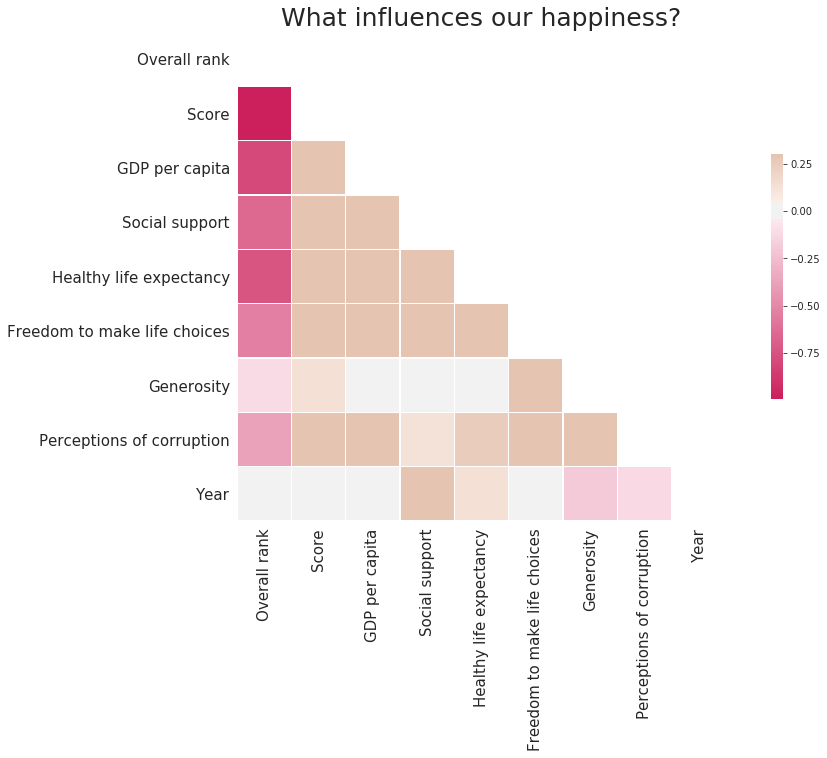

In [17]:
# Computing the Correlation Matrix

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('What influences our happiness?', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

It seems that Happiness is influenced the **most by GDP (money moneyyy💰)** (very strong correlation) and **Health**. There is also medium positive correlation between Happiness, Freedom and Health. 

## VII. Globe Map 2019

In [18]:
# import os
# print(list(os.listdir("../input")))

In [19]:
#json file with the world map
import matplotlib.pyplot as plt
import geopandas as gpd

country_geo = gpd.read_file('../input/worldcountries/world-countries.json')

#import another CSV file that contains country codes
country_codes = pd.read_csv('../input/iso-country-codes-global/wikipedia-iso-country-codes.csv')
country_codes.rename(columns = {'English short name lower case' : 'Country or region'}, inplace = True)

#Merge the 2 files together to create the data to display on the map
data_to_plot = pd.merge(left= country_codes[['Alpha-3 code', 'Country or region']], 
                        right= country_score_avg[['Score', 'Country or region']], 
                        how='inner', on = ['Country or region'])
data_to_plot.drop(labels = 'Country or region', axis = 1, inplace = True)

data_to_plot.head(2)

,Alpha-3 code,Score
0,ZWE,3.663
1,ZMB,4.107


In [20]:
#Creating the map using Folium Package
my_map = folium.Map(location=[10, 6], zoom_start=1.49)

my_map.choropleth(geo_data=country_geo, data=data_to_plot, 
                  name='choropleth',
                  columns=['Alpha-3 code', 'Score'],
                  key_on='feature.id',
                  fill_color='BuPu', fill_opacity=0.5, line_opacity=0.2,
                  nan_fill_color='white',
                  legend_name='Average Happiness Indicator')

my_map.save('data_to_plot.html')

from IPython.display import HTML
HTML('<iframe src=data_to_plot.html width=850 height=500></iframe>')

![Annotation%202020-02-19%20215951.png](https://i.imgur.com/BRX6Zur.png)

So.......

1. **The Nordics** and the **West** is the happiest. + **Australia** (kangaroos just MUST be a factor)
2. **East Europe** and the majority of Asia is in the middle.
3. **The South** is the least happiest.

# 3. A predictive model, because why not ?

After all that jazz, I couldn't help myself.

What if we tried to predict the happiness score of a country using the other factors available in the analysis?

## I. Imports:

In [21]:
# Importing the libraries
from sklearn.model_selection import train_test_split # for data validation

# Models
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoLars
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

# Metrics and Grid Search
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV

## II. Preparing...

In [22]:
# Creating the table
data_model = data.groupby(by= 'Country or region')['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'].mean().reset_index()

# Creating the dependent and independent variables
y = data_model['Score']
X = data_model[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

# Splitting the data to avoid under/overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## III. Models probation:

In [23]:
# Creating a predefined function to test the models
def modelfit(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, preds)
    print('MAE:', round(mae,4))

In [24]:
# Linear Regression

lm = LinearRegression(n_jobs = 10000)
modelfit(lm)

MAE: 0.3769


In [25]:
# Random Forest Regressor

rf = RandomForestRegressor(n_jobs = 1000)
modelfit(rf)

MAE: 0.3986


In [26]:
# XGBoost
xg = XGBRegressor(learning_rate=0.1, n_estimators=5000)
modelfit(xg)

[12:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.401


In [27]:
# Decision Tree
dt = DecisionTreeRegressor()
modelfit(dt)

MAE: 0.5293


In [28]:
# Bayesian Linear Model
br = BayesianRidge(n_iter=1000, tol = 0.5)
modelfit(br)

MAE: 0.3723


In [29]:
# Lasso Lars
ls = LassoLars()
modelfit(ls)

MAE: 0.9779


In [30]:
final_model = BayesianRidge(n_iter = 10, tol = 0.1, alpha_2 = 0.1)
final_model.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=0.1, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=10,
              normalize=False, tol=0.1, verbose=False)

Linear Regression and the Bayesian Ridge were the models that performed the best (they had the smallest mae out of all)

Also did some **parameter tuning**, but the MAE score didn't change.

So, we have a winner: Congrats to Bayesian Ridge (if you found a better model, please don't keep it to yourself 😁)

## IV. How important are the variables?

In [31]:
# How important is each variable into predicting the overall Happiness Score?

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=final_model, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator= perm, feature_names = X_test.columns.tolist())

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


Weight,Feature
0.3884 ± 0.1075,GDP per capita
0.1527 ± 0.0554,Social support
0.1069 ± 0.0420,Freedom to make life choices
0.0430 ± 0.0187,Healthy life expectancy
0.0101 ± 0.0072,Perceptions of corruption
0.0077 ± 0.0039,Generosity


What actually influences our general well-being?

* Looks like **money** is of the highest importance.
* Following up next is **social support**, meaning the relationships in a family and the closest group of friends. Human interaction.
* I would like to point out **freedom** as well. Freedom to act. To talk. But careful not to overstep others tho.
* The last one is **generosity**, but who likes to share anyway?

# 4. Final Thoughts

This report is amazing. Very helpful for many industries, as it assesses the overall mood of a nation, as well as gives a glimpse into how it is evolving in time.

It also points out to what makes us happy. What we value the most as beings. What do we want in order to feel contempt and happy with our lives.

*And this report gives just that answer: money and healthy relationships... in exactly that order* 😅

If you guys have any ideas on how to improve this, do not hold yourselves.

<div class="alert alert-block alert-info">
<p><p>
<p>If you liked this, don't be shy, upvote! 😁<p>
<b>Cheers!<b>
<p><p>
</div>